In [1]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline

In [100]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
df.head(4)

source  target    volume  capacity       voc  degree  free_travel_time  \
eid                                                                             
101         1       2   67.2220      2850  0.023587     158          0.268594   
20415       1    5748   53.1765      2850  0.018658     108          1.238560   
14254       1    9437  262.0150      2850  0.091935     406          1.354030   
11874       2    9950    8.0050      9405  0.000851       8          1.067390   

       travel_time  
eid                 
101       0.268594  
20415     1.238560  
14254     1.354040  
11874     1.067390

In [113]:
# Let's define an empty undirected graph.
RG = nx.Graph()
# We also define the values for the edge attributes
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
i = 0
#
for row in df.itertuples(index=False):
    i +=1
    # If we use all the nodes, plotting the network takes a very long time!
    if i < 1000:
        # Here row is actually column, row[2:] means from column 3 to the last column
        values = row[2:]
        # We create a dictionary "edge_attributes" with the keys and row values
        edge_attributes = dict(zip(keys, values))
        # Build a tuple(type of data) that consist of column 1 and 2, that is O&D points' node_id
        my_tuple = (row[0], row[1])        
        # We add the edge "*my_tuple" and its "edge_attributes" as "attr_dict" to the graph
        RG.add_edge(*my_tuple, attr_dict=edge_attributes)
# Analysis the degrees use nx.degree() function        
degrees = nx.degree(RG)
# ***Remember to cancel this when you change i to large numbers. This is only for test print the variables.***
####print edge_attributes
##{'capacity': 2850, 'degree': 108, 'voc': 0.018658399999999999, 'volume': 53.176499999999997, 
##'travel_time': 1.2385600000000001, 'free_travel_time': 1.2385600000000001}
####print values
#(53.176499999999997, 2850, 0.018658399999999999, 108, 1.2385600000000001, 1.2385600000000001)
####print degrees
##{1: 2, 2: 1, 5748: 1}

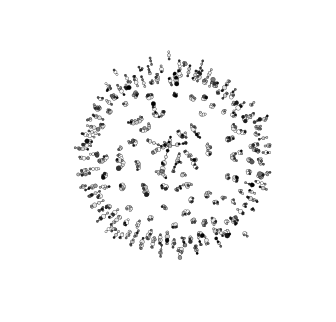

In [114]:
# Plotting might take a bit! We can stand up and stretch for a bit!

plt.figure(figsize=(4,4))
P = nx.spring_layout(RG)

#  Here we multiply the degree value times 10 to see the difference in size on our plot.
node_sizes = [v * 5 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
###print node_colors
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors);

In [115]:
# If I pick any two intersections, is it possible to find a route 
# between them? Check if the network is connected.
print "*Is the road network connected? "+ str(nx.is_connected(RG)) + "\n"

# Here we generate all the shortest paths from the graph. Records in Dictionary "paths"
paths = nx.shortest_path(RG)

# Since all the paths are stored in a big dictionary, we can access the shortest path of every node by its index or name!
# We can start by printing all the paths from node_id 1
print "*All Paths starting from Node '1':"
print str(paths[1]) ## "paths" is a dictionary with format of {node_id:}
print "\n"

# Since within node_id 1, it connects to node_id 9950, we can count the number of nodes that exist between both
print "*Count Paths (length) from Node'1' to Node'9950' is: " + str(len(paths[1][9950]))
print "*Namely: " + str(paths[1][9950])

*Is the road network connected? False

*All Paths starting from Node '1':
{1: [1], 2: [1, 2], 1441: [1, 2, 7438, 120, 119, 1441], 466: [1, 2, 7438, 120, 466], 7438: [1, 2, 7438], 4125: [1, 2, 7438, 338, 4125], 338: [1, 2, 7438, 338], 339: [1, 2, 7438, 338, 339], 5748: [1, 5748], 4126: [1, 2, 7438, 120, 4126], 119: [1, 2, 7438, 120, 119], 120: [1, 2, 7438, 120], 4858: [1, 2, 7438, 338, 4858], 7931: [1, 2, 7438, 120, 7931], 9437: [1, 9437], 9950: [1, 2, 9950], 4961: [1, 2, 7438, 120, 119, 4961]}


*Count Paths (length) from Node'1' to Node'9950' is: 3
*Namely: [1, 2, 9950]


In [116]:
# Import json, Read riyadh network node data to get st_x, st_y (Lng, Lat)
import json
Nodes = pd.read_csv("data/riyadh_nodes.txt", sep=" ") ## <nrows> define the total rows that are read
print "* Total Nodes Numbers read is: " + str(len(Nodes)) + "\n"
Nodes.head(3)

* Total Nodes Numbers read is: 10728



id       st_x       st_y
0   1  46.849302  24.701475
1   2  46.848467  24.702946
2   3  46.632126  24.798601

In [117]:
# Now construct the multi-tier dictionary structures.
# Build the 1st tier dictionary, called "geoDataSet".
geoDataSet  = {} 
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

# Build a dictionary "Coordinate" {id:[st_x,st_y]} that join node id with st_x and st_y. 
Coordinate = {}
for i in range(len(Nodes["id"])):  # i =0,1,2,...    
    idx = Nodes["id"][i]           # idx = 1,2,3,... In fact 'idx' is 'id' in dataframe "Nodes"
    Coordinate[idx]=[Nodes["st_x"][i],Nodes["st_y"][i]]
    
print "Length of dict 'Coordinate': " + str(len(Coordinate)) ## Test Print
print Coordinate[50]  ## Test Print

Length of dict 'Coordinate': 10728
[46.912201567778098, 24.551144860641898]


In [ ]:
for i in range(len(Coordinate)):         # i =0,1,2,...,    
    id_o = Nodes["id"][i]                  # idx = 1,2,3,... In fact 'idx' is 'id' of dataframe "Nodes"
    print "1* When i= "+str(i)+ ", Orientation Node= "+str(id_o)
    steps = len(paths[id_o].keys())  # Count how many successful lines connected to a node, including itself
    if steps >1:
        print "2* All Paths to Ori_node are "+str(paths[id_o])  # when idx=1, len(paths[idx])=3
        ###print len(paths[idx].keys())       # when idx=1, len(path[idx].keys())=3
        destination = [] # Define a list "destination" [] that use to record all the destinations
        #print paths[idx]
        #print Coordinate[idx]

        ## Get all the nodes id that connect with node i.
        for key in paths[id_o]: # when idx=1,paths[1]={1:[1],2:[1, 2],5748:[1, 5748]}, key=1,then 2,then 5748       
            destination.append(key)                
        print "3* Total destination is"+ str(destination)+"\n"

        for index in range(steps):        
            id_des = destination[index]
            print "4.1** When index= " + str(index)+"， Destination Node= " + str(id_des)
            tmp_dict = {}
            tmp_dict["type"] = "Feature"
            tmp_dict["geometry"] = {}
            tmp_dict["geometry"]["type"] = "LineString"
            tmp_dict["geometry"]["coordinates"] = []        
            tmp_coor=[Coordinate[id_o]] ## Already insert one origin point to avoid single point situation
            print "4.2** O_Node_"+str(id_des) +"'s coordination is"+ str(Coordinate[id_o])      
            for x in paths[id_o][id_des]:            
                tmp_coor.append(Coordinate[x])            
            print "4.3** Temporary Destination List=" + str(tmp_coor)        
            tmp_dict["geometry"]["coordinates"].append(tmp_coor)
            print "4.4** tmp_dict are: "+str(tmp_dict)+"\n"       
            geoDataSet["features"].append(tmp_dict)

        print "4*" + str(geoDataSet)+ "\n"

1* When i= 0, Orientation Node= 1
2* All Paths to Ori_node are {1: [1], 2: [1, 2], 1441: [1, 2, 7438, 120, 119, 1441], 466: [1, 2, 7438, 120, 466], 7438: [1, 2, 7438], 4125: [1, 2, 7438, 338, 4125], 338: [1, 2, 7438, 338], 339: [1, 2, 7438, 338, 339], 5748: [1, 5748], 4126: [1, 2, 7438, 120, 4126], 119: [1, 2, 7438, 120, 119], 120: [1, 2, 7438, 120], 4858: [1, 2, 7438, 338, 4858], 7931: [1, 2, 7438, 120, 7931], 9437: [1, 9437], 9950: [1, 2, 9950], 4961: [1, 2, 7438, 120, 119, 4961]}
3* Total destination is[1, 2, 1441, 466, 7438, 4125, 338, 339, 5748, 4126, 119, 120, 4858, 7931, 9437, 9950, 4961]

4.1** When index= 0， Destination Node= 1
4.2** O_Node_1's coordination is[46.849302248324101, 24.701475446932697]
4.3** Temporary Destination List=[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697]]
4.4** tmp_dict are: {'geometry': {'type': 'LineString', 'coordinates': [[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697]]]}, 'typ

In [119]:
print json.dumps(geoDataSet)

{"type": "FeatureCollection", "features": [{"geometry": {"type": "LineString", "coordinates": [[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697]]]}, "type": "Feature"}, {"geometry": {"type": "LineString", "coordinates": [[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697], [46.8484666275181, 24.7029460895643]]]}, "type": "Feature"}, {"geometry": {"type": "LineString", "coordinates": [[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697], [46.8484666275181, 24.7029460895643], [46.840728270021899, 24.699371165862498], [46.8457688946906, 24.690434300194301], [46.854793144694995, 24.674383388965996], [46.844817020800399, 24.669739253628503]]]}, "type": "Feature"}, {"geometry": {"type": "LineString", "coordinates": [[[46.849302248324101, 24.701475446932697], [46.849302248324101, 24.701475446932697], [46.8484666275181, 24.7029460895643], [46.840728270021899, 24.699371165862498], [46.8457688946906,